In [1]:
import mailbox
import pandas as pd
import csv
import unicodedata
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})

from time import time
from collections import Counter


In [2]:
file_path = 'gmail_data.mbox'
mbox = mailbox.mbox(file_path)
print('samples:', len(mbox))

samples: 6704


In [3]:
# print fields
for i, key in enumerate(mbox[0].keys()):
    print(i+1, key)

1 X-GM-THRID
2 X-Gmail-Labels
3 Delivered-To
4 Received
5 X-Google-Smtp-Source
6 X-Received
7 ARC-Seal
8 ARC-Message-Signature
9 ARC-Authentication-Results
10 Return-Path
11 Received
12 Received-SPF
13 Authentication-Results
14 DKIM-Signature
15 DKIM-Signature
16 X-Feedback-Id
17 X-Mailgun-Sending-Ip
18 X-Mailgun-Sid
19 Received
20 Sender
21 Message-ID
22 Date
23 Subject
24 From
25 To
26 MIME-Version
27 Content-Type
28 Content-Transfer-Encoding
29 X-Mailer-Hash


In [4]:
t0 = time()
subject = []
from_ = []
to = []
date = []
label = []
for i, message in enumerate(mbox):
    try:
        if i%2000 == 0:
            print(i, end=' ')
        subject.append(message['subject'])
        from_.append(message['from'])
        to.append(message['to'])
        date.append(message['date'])
        label.append(message['X-Gmail-Labels'])
    except:
        print(i, end=' ')
        print('subject', subject[i])
        print('from', from_[i])
        print('to', to[i])
        print('date', date[i])
        print('label', label[i])
print('\ntime: {:.1f} min'.format((time()-t0)/60))

0 2000 4000 6000 
time: 1.0 min


In [5]:

df = pd.DataFrame()
df['subject'] = subject
df['from'] = from_
df['to'] = to
df['date'] = date
df['label'] = label

In [6]:
df[['subject', 'date', 'label']].head()

,subject,date,label
0,Servicios - Hola Ricardo ! Te invitamos a post...,"Wed, 17 Jun 2020 11:51:36 -0400","Important,Trash,Opened,Category Updates"
1,=?UTF-8?Q?Notificaci=C3=B3n=3A_Use_up_retainer...,"Thu, 18 Jun 2020 00:30:12 +0000","Trash,Category Updates,Unread"
2,=?utf-8?B?TmVzdGzDqSBDaGlsZSBTQSB5YSByZWNpYmnD...,"Wed, 17 Jun 2020 13:18:21 +0000 (UTC)","Trash,Category Updates,Unread"
3,=?utf-8?B?TmVzdGzDqSBDaGlsZSBTQSB5YSByZWNpYmnD...,"Wed, 17 Jun 2020 13:17:54 +0000 (UTC)","Trash,Category Updates,Unread"
4,=?utf-8?B?U3VwZXJtZXJjYWRvcyBVbmltYXJjIHlh?=\n...,"Wed, 17 Jun 2020 13:22:19 +0000 (UTC)","Trash,Category Updates,Unread"


In [7]:
def remove_accents(text):
    text = str(text)
    nfkd_norm = unicodedata.normalize('NFKD', text)
    text = nfkd_norm.encode('ASCII', 'ignore').decode('utf-8')
    return text

In [8]:
df['subject'] = df['subject'].map(remove_accents)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  6704 non-null   object
 1   from     6704 non-null   object
 2   to       6671 non-null   object
 3   date     6694 non-null   object
 4   label    6703 non-null   object
dtypes: object(5)
memory usage: 262.0+ KB


In [10]:
df[df['date'].isnull()][['subject', 'to', 'date']].head()


,subject,to,date
4203,None,None,None
4494,None,None,None
4495,None,None,None
5855,None,None,None
5856,None,None,None


In [11]:
len(df[df['date'].isnull()])
len(df)

6704

In [12]:
df[['date']].head()


,date
0,"Wed, 17 Jun 2020 11:51:36 -0400"
1,"Thu, 18 Jun 2020 00:30:12 +0000"
2,"Wed, 17 Jun 2020 13:18:21 +0000 (UTC)"
3,"Wed, 17 Jun 2020 13:17:54 +0000 (UTC)"
4,"Wed, 17 Jun 2020 13:22:19 +0000 (UTC)"


In [13]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))


C:\Users\rc_sh\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\Users\rc_sh\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname UT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [14]:
df = df[df['date'].notnull()]


In [15]:
df = df.sort_values(['date'], ascending=False)
df = df.reset_index(drop=True)

In [16]:
df[['subject', 'date', 'label']].head(8)


,subject,date,label
0,Archive of Google data requested,2020-06-18 16:20:07+00:00,"Inbox,Important,Category Personal,Unread"
1,DESARROLLADOR DE PROYECTOS PV/WIND,2020-06-18 16:16:51+00:00,"Archived,Sent"
2,=?utf-8?Q?Your_Application_to_the_Position_of_...,2020-06-18 15:39:48+00:00,"Trash,Category Updates,Unread"
3,=?utf-8?Q?Your_Application_to_the_Position_of_...,2020-06-18 15:29:53+00:00,"Trash,Category Updates,Unread"
4,YoBit: Get Paid for Posts & Rates!,2020-06-18 15:17:03+00:00,"Trash,Category Updates,Unread"
5,"(Control HSEQ- Proyecto Rancagua-Sauzal , 2020...",2020-06-18 14:49:04+00:00,"Trash,Category Updates,Unread"
6,(INGENIEROS PYC (EXPERIENCIA 5 =?UTF-8?q?A=C3=...,2020-06-18 14:48:02+00:00,"Trash,Category Updates,Unread"
7,Test Engineer,2020-06-18 13:58:52+00:00,"Archived,Sent"


In [17]:
df[['subject', 'date', 'label']].tail(9)


,subject,date,label
6578,Hola Albany,2008-01-18 18:45:52+00:00,"Sent,Opened"
6579,presentacion powerpoint,2007-12-21 21:25:48+00:00,Unread
6580,Agenda 2008,2007-12-16 17:21:12+00:00,Opened
6581,Fw: Respaldo pasaportes. 16/11/2007,2007-12-15 15:48:12+00:00,"Opened,Starred,Mercadolibre,pasaportes"
6582,I have a new Yahoo! Mail address,2007-12-15 15:47:57+00:00,"Starred,Mercadolibre,pasaportes"
6583,FW: PARA NUNCA\n OLVIDAR.........................,2007-12-15 15:20:05+00:00,"Opened,Starred,Mercadolibre"
6584,=?iso-8859-1?Q?Fw=3A_Confirmaci=F3n_de_cuenta_...,2007-12-15 15:17:46+00:00,"Opened,Starred,Mercadolibre"
6585,Fw: Sistema Automatizado - CADIVI,2007-12-15 15:16:44+00:00,"Opened,Mercadolibre"
6586,=?iso-8859-1?Q?Fw=3A_Tu_contrase=F1a_de_YouTube?=,2007-12-15 15:16:14+00:00,"Starred,Mercadolibre"


In [18]:
df = df[df['label'] != 'Drafts']

cnt = 0
idx_to_remove = []
for i, lab in enumerate(df['label']):
    if 'Spam' in str(lab):
        idx_to_remove.append(i)
        
df = df.drop(df.index[idx_to_remove])
df = df.reset_index(drop=True)

df.to_csv('gmail_data_preprocessed.csv', 
          encoding='utf-8', index=False)

### Data exploration


In [19]:
df = pd.read_csv('gmail_data_preprocessed.csv')
len(df)

6578

In [20]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))

def rename_me(txt):
    txt = str(txt).lower()
    if('ricardo calleja' in txt or
       'saviercalleja' in txt):
        txt_out = 'me'
    else:
        txt_out = txt
    return txt_out


df['from'] = df['from'].apply(rename_me)
df['to'] = df['to'].apply(rename_me)

df[['subject', 'to', 'date', 'label']].head(4)

,subject,to,date,label
0,Archive of Google data requested,me,2020-06-18 16:20:07+00:00,"Inbox,Important,Category Personal,Unread"
1,DESARROLLADOR DE PROYECTOS PV/WIND,laura.tartiere@robertwalters.com,2020-06-18 16:16:51+00:00,"Archived,Sent"
2,=?utf-8?Q?Your_Application_to_the_Position_of_...,me,2020-06-18 15:39:48+00:00,"Trash,Category Updates,Unread"
3,=?utf-8?Q?Your_Application_to_the_Position_of_...,me,2020-06-18 15:29:53+00:00,"Trash,Category Updates,Unread"


In [21]:
df['count'] = [1 for _ in range(len(df))]


In [22]:
data = df.copy()
data.set_index('date', drop=True, inplace=True)
data_in = data[data['to'] == 'me']
data_out = data[data['from'] == 'me']

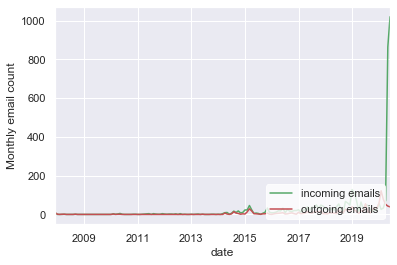

In [23]:
monthly_in = data_in['count'].resample('M').sum()
monthly_out= data_out['count'].resample('M').sum()
monthly_in.plot(color='g', label='incoming emails')
monthly_out.plot(color='r', label='outgoing emails')
plt.ylabel('Monthly email count')
plt.legend(loc='lower right', frameon=True).get_frame().set_color('white');

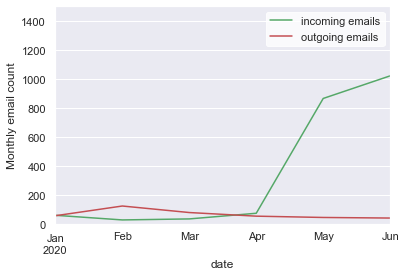

In [24]:

monthly_in.plot(color='g', label='incoming emails')
monthly_out.plot(color='r', label='outgoing emails')
plt.ylabel('Monthly email count')
plt.axis(['2020-01-01', '2020-06-01', 0, 1500])
plt.legend(loc='best', frameon=True).get_frame().set_color('white');

In [25]:
dow = []
for i in range(len(df)):
    dow.append(df['date'][i].weekday())

In [26]:
df['dow'] = dow
df[['subject', 'date', 'dow', 'label']].head(4)

,subject,date,dow,label
0,Archive of Google data requested,2020-06-18 16:20:07+00:00,3,"Inbox,Important,Category Personal,Unread"
1,DESARROLLADOR DE PROYECTOS PV/WIND,2020-06-18 16:16:51+00:00,3,"Archived,Sent"
2,=?utf-8?Q?Your_Application_to_the_Position_of_...,2020-06-18 15:39:48+00:00,3,"Trash,Category Updates,Unread"
3,=?utf-8?Q?Your_Application_to_the_Position_of_...,2020-06-18 15:29:53+00:00,3,"Trash,Category Updates,Unread"


In [27]:
df_in = df[df['to'] == 'me']
df_out = df[df['from'] == 'me']


In [28]:
dow_in, dow_out = {}, {}
for i in range(7):
    dow_in[i] = 0
    dow_out[i] = 0
for i in df_in['dow']:
    dow_in[i] += 1
for i in df_out['dow']:
    dow_out[i] += 1

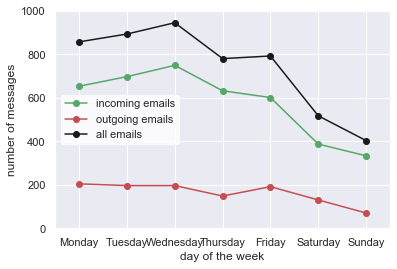

In [29]:

x, y_in, y_out, y_all = [], [], [], []
for key in dow_in.keys():
    x.append(key)
    y_in.append(dow_in[key])
    y_out.append(dow_out[key])
    y_all.append(dow_in[key] + dow_out[key])

plt.plot(x, y_in, 'o-', color='g', label='incoming emails')
plt.plot(x, y_out, 'o-', color='r', label='outgoing emails')
plt.plot(x, y_all, 'o-', color='k', label='all emails')
plt.axis([-0.5, 6.5, 0, 1000])
plt.xlabel('day of the week')
plt.ylabel('number of messages')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(x, days)
plt.legend(frameon=True).get_frame().set_color('white');